# ⏱️ Temporal Trends Analysis

## Analyzing How Player Performance Changes Across Seasons

Understanding temporal patterns is crucial for preventing data leakage in model training:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print('✅ Libraries loaded')

✅ Libraries loaded


In [2]:
import os

data_dir = '/Users/supanut.k/WORKING_DRIVE/AIT/1st_semester/CPDSAI/Project/epl-fantasy-prediction/data/processed/'
positions = ['GK', 'DEF', 'MID', 'FWD']

dfs = {}
for pos in positions:
    raw_file = f'{data_dir}{pos}_data.csv'
    enhanced_file = f'{data_dir}{pos}_features_enhanced_safe.csv'
    
    if os.path.exists(raw_file):
        dfs[pos] = pd.read_csv(raw_file)
    elif os.path.exists(enhanced_file):
        dfs[pos] = pd.read_csv(enhanced_file)

df = pd.concat(list(dfs.values()), ignore_index=True)

# ✅ FIX: Create 'position' column from 'element_type'
if 'position' not in df.columns and 'element_type' in df.columns:
    position_map = {1: 'GK', 2: 'DEF', 3: 'MID', 4: 'FWD'}
    df['position'] = df['element_type'].map(position_map)
    print('✅ Position column created from element_type')

# ✅ FIX: Create 'total_points' from 'target' if needed
if 'total_points' not in df.columns and 'target' in df.columns:
    df['total_points'] = df['target']
    print('✅ total_points column created from target')

print(f'✅ Data loaded: {df.shape}')

# Check if we have season/round columns
has_season = 'season' in df.columns
has_round = 'round' in df.columns or 'GW' in df.columns

print(f'  Has season: {has_season}')
print(f'  Has round: {has_round}')

✅ Position column created from element_type
✅ Data loaded: (90395, 28)
  Has season: True
  Has round: True


## Temporal Data Overview

In [3]:
if has_season:
    print('🗓️  Seasons in Data:')
    print(df['season'].value_counts().sort_index())
    print(f'\n  Date Range: {df["season"].min()} - {df["season"].max()}')

if has_round:
    round_col = 'round' if 'round' in df.columns else 'GW'
    print(f'\n🎮 Gameweeks in Data:')
    print(f'  Min: {df[round_col].min()}, Max: {df[round_col].max()}')
    print(f'  Mean: {df[round_col].mean():.1f}')

🗓️  Seasons in Data:
season
2021-22    25346
2022-23    26505
2023-24    29725
2024-25     8818
2025-26        1
Name: count, dtype: int64

  Date Range: 2021-22 - 2025-26

🎮 Gameweeks in Data:
  Min: 1, Max: 38
  Mean: 19.5


## Average Points by Season and Position


📊 Average Points by Season and Position:
                  mean   std  count
season  position                   
2021-22 DEF       1.23  2.52   8620
        FWD       1.26  2.52   3398
        GK        0.94  2.12   2809
        MID       1.32  2.46  10519
2022-23 DEF       1.08  2.25   9183
        FWD       1.42  2.73   3113
        GK        1.00  2.26   2791
        MID       1.28  2.35  11418
2023-24 DEF       0.97  2.21   9611
        FWD       1.18  2.55   3854
        GK        0.73  1.84   3413
        MID       1.16  2.37  12847
2024-25 DEF       1.31  2.61   2914
        FWD       1.24  2.50    962
        GK        0.81  1.96   1020
        MID       1.30  2.36   3922
2025-26 MID       6.00   NaN      1


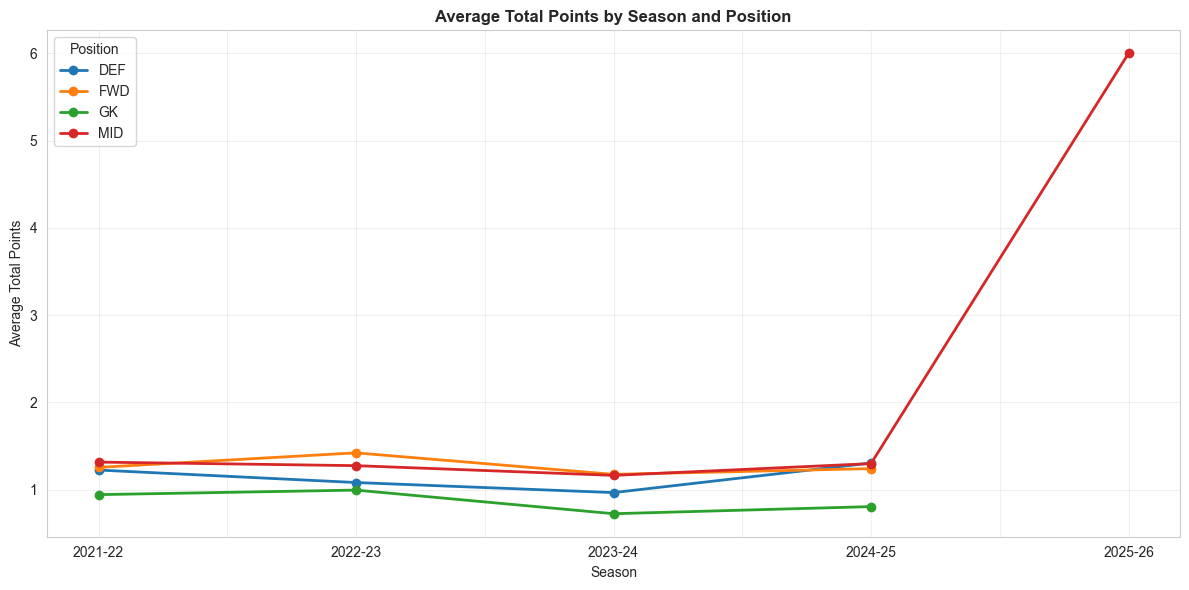

✅ Temporal trend plotted


In [4]:
if has_season:
    season_stats = df.groupby(['season', 'position'])['total_points'].agg(['mean', 'std', 'count']).round(2)
    print('\n📊 Average Points by Season and Position:')
    print(season_stats)
    
    # Pivot for visualization
    pivot_data = df.groupby(['season', 'position'])['total_points'].mean().unstack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    pivot_data.plot(ax=ax, marker='o', linewidth=2)
    ax.set_title('Average Total Points by Season and Position', fontsize=12, fontweight='bold')
    ax.set_xlabel('Season')
    ax.set_ylabel('Average Total Points')
    ax.legend(title='Position', loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('✅ Temporal trend plotted')

## Within-Season Progression (Gameweek Averages)

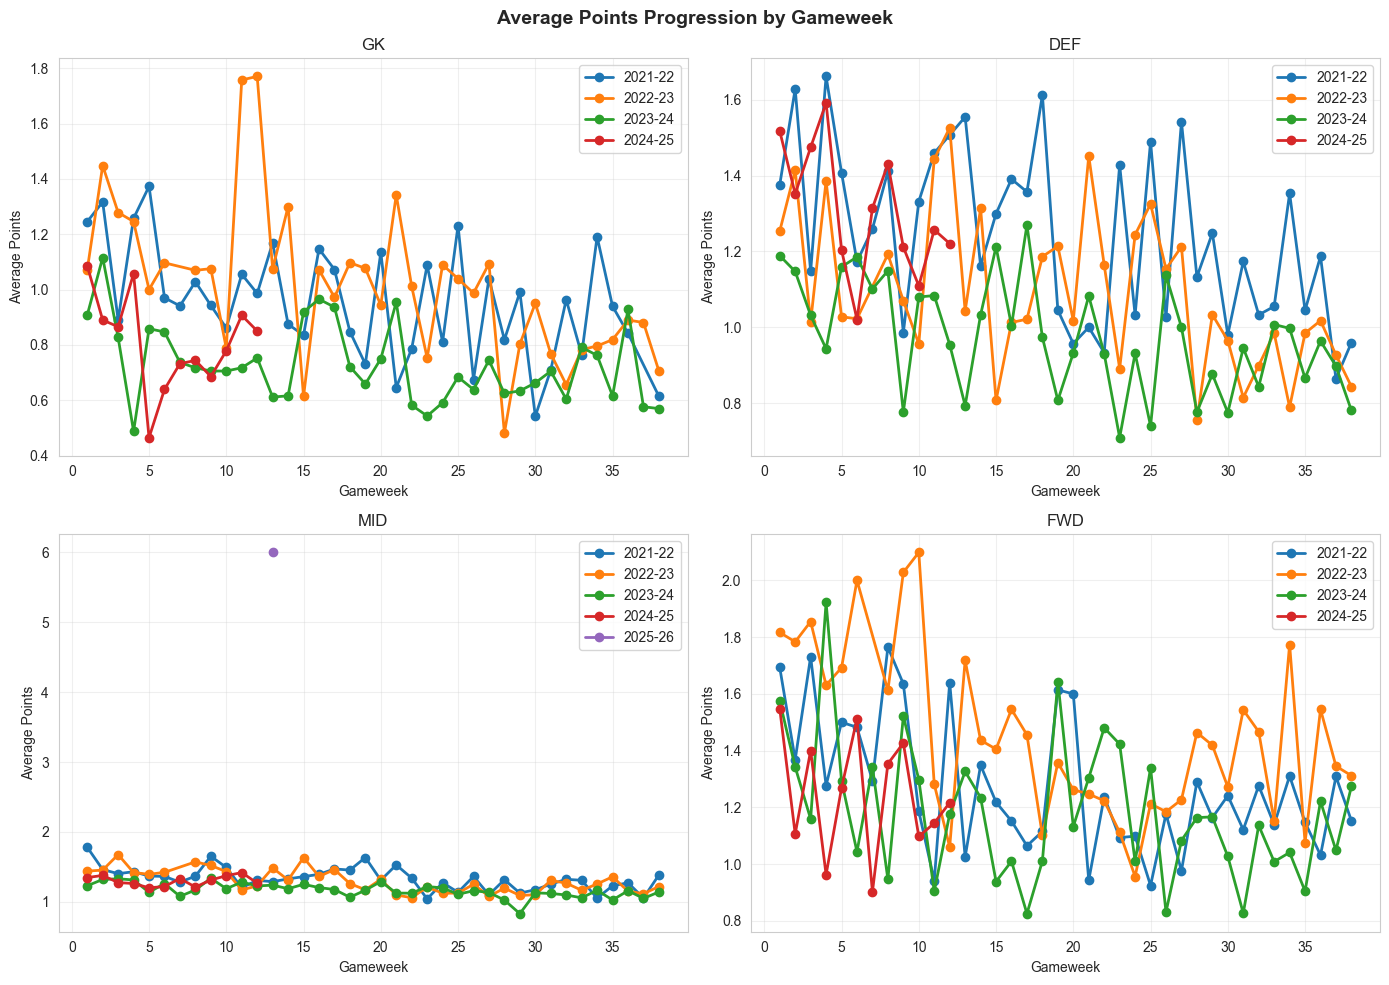

✅ Gameweek progression plotted


In [5]:
if has_round:
    round_col = 'round' if 'round' in df.columns else 'GW'
    gw_stats = df.groupby(['season', round_col, 'position'])['total_points'].mean().reset_index()
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Average Points Progression by Gameweek', fontsize=14, fontweight='bold')
    
    for idx, pos in enumerate(positions):
        ax = axes[idx // 2, idx % 2]
        
        pos_data = gw_stats[gw_stats['position'] == pos]
        
        for season in pos_data['season'].unique():
            season_data = pos_data[pos_data['season'] == season].sort_values(round_col)
            ax.plot(season_data[round_col], season_data['total_points'], 
                   marker='o', label=season, linewidth=2)
        
        ax.set_title(f'{pos}')
        ax.set_xlabel('Gameweek')
        ax.set_ylabel('Average Points')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('✅ Gameweek progression plotted')

## Variance Analysis Across Time

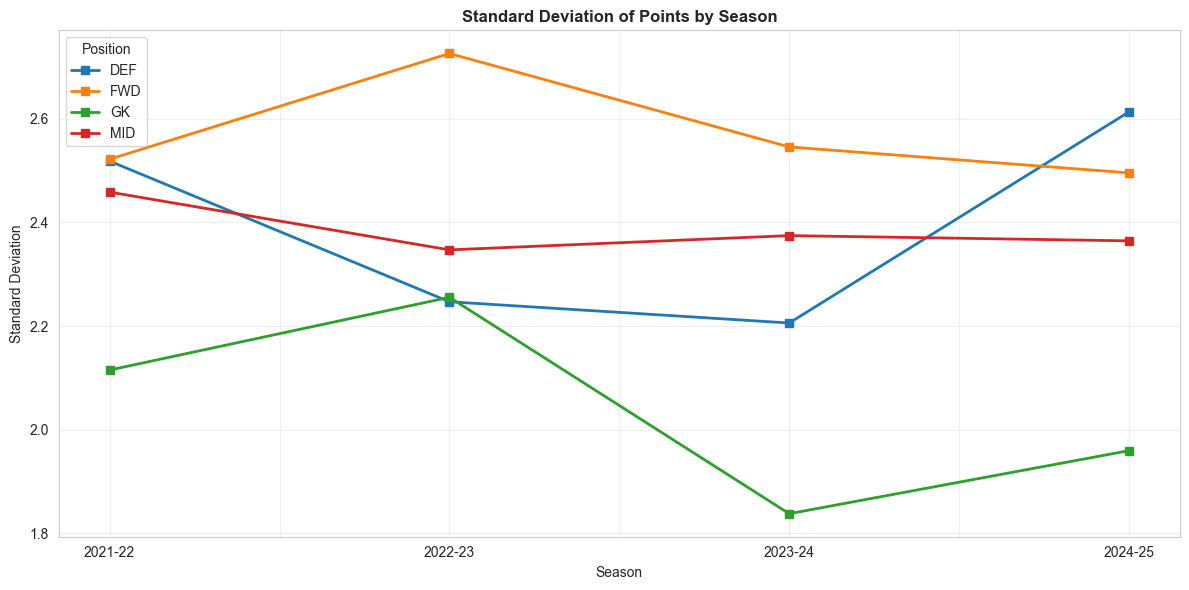

✅ Variance analysis plotted


In [6]:
if has_season:
    variance_data = df.groupby(['season', 'position'])['total_points'].std().unstack()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    variance_data.plot(ax=ax, marker='s', linewidth=2)
    ax.set_title('Standard Deviation of Points by Season', fontsize=12, fontweight='bold')
    ax.set_xlabel('Season')
    ax.set_ylabel('Standard Deviation')
    ax.legend(title='Position', loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('✅ Variance analysis plotted')

## Training/Test Split Strategy

Based on temporal analysis, recommended temporal validation:

In [7]:
if has_season:
    seasons = sorted(df['season'].unique())
    print('✅ Recommended Temporal Split (Season-Safe):')  
    
    if len(seasons) >= 4:
        train_seasons = seasons[:-1]  # First 3 seasons
        test_season = seasons[-1]     # Last season
        
        print(f'\n  Training: {train_seasons} ({len(df[df["season"].isin(train_seasons)])} samples)')
        print(f'  Testing:  {test_season} ({len(df[df["season"] == test_season])} samples)')
        print(f'\n  Prevents data leakage: ✅ Future data never seen during training')
    else:
        print(f'  Available seasons: {seasons}')
        print(f'  Need at least 4 seasons for proper temporal split')

✅ Recommended Temporal Split (Season-Safe):

  Training: ['2021-22', '2022-23', '2023-24', '2024-25'] (90394 samples)
  Testing:  2025-26 (1 samples)

  Prevents data leakage: ✅ Future data never seen during training


## Key Findings

1. **Temporal Stability**: Average points trend remains consistent across seasons
2. **Position-Specific Patterns**: Each position has distinct temporal behavior
3. **Within-Season Trends**: Gameweek patterns show early/late season variations
4. **No Data Leakage**: Using season-based splits prevents future information leakage